<a href="https://colab.research.google.com/github/putripebriyani/MSIB-K2-KelasAwanPintar/blob/main/Salinan_dari_RB_03_Data_Exploration_NLP_(Coach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration in NLP (TF-IDF & Cosine Similarity)**

## **Membangun Sebuah Teks Korpus**

Dalam praktik NLP kali ini, kita akan memahami bagaimana membangun sebuah proses dari data teks yang akan digunakan untuk klasifikasi teks atau mencari kesamaan dalam suatu dokumen teks.

**Feature Engineering** merupakan bagian terpenting dalam eksplorasi data teks sebelum melakukan modelling. Tahapan-tahapan *feature engineering* yang akan dipelajari yaitu:

1.   **Bag Of Words Model (BoW)**
2.   **TF-IDF Model**
3.   **Word2Vec or Vectorization**
4.   **Document Similarity**

Keempat tahapan ini merupakan bagian terpenting dalam *feature engineering* yang akan dipakai untuk mencari suatu fitur pada data teks atau dokumen yang akan di analisa.



## **Memahami Data Teks**

Data Teks merupakan data yang bersifat tidak terstruktur (Unstructured data) sehingga komputer tidak bisa membaca atau memproses dengan baik ketika data teks diproses dan harus di konversikan menjadi angka atau vektor agar komputer bisa memahami data yang telah dikonversi. Berikut adalah contoh dari data kalimat atau teks yang dibuat dalam bentuk teks korpus.

### **Import Library**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd             # library manipulasi data
import numpy as np              # Library komputasi matematika
import re                       # Regular Expressions
import nltk                     # Library Natural Language Processing
import matplotlib.pyplot as plt # Library Visualisasi Data

pd.options.display.max_colwidth = 200
%matplotlib inline

In [2]:
# Membuat data teks korpus beserta labelnya
corpus = ['Langit yang cerah dan indah sekali.',
          'Jatuh cinta saat itu, aku melihat langit yang berwarna biru!',
          'Kucing ku selalu mengeong tanpa sebab.',
          "Sarapanku pagi ini hanya berupa sayuran, buah-buahan dan susu",
          'Gulai Tikungan memang selalu enak walaupun porsinya sedikit',
          'Ketika Anjingku bersuara, disitulah aku mulai gelisah!',
          'Langit sore hari membuatku mengingat masa lalu yang indah',
          'Kucingku entah kenapa tiba-tiba merasakan hal yang sensitif!'
]
# Membuat label pada teks dokumen yang dibuat
labels = ['Cuaca', 'Cuaca', 'Hewan', 'Makanan', 'Makanan', 'Hewan', 'Cuaca', 'Hewan']

corpus = np.array(corpus)
# Membuat dataframe pada data teks korpus
corpus_df = pd.DataFrame({'Document': corpus,
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
# Menampilkan dataframe
corpus_df

,Document,Category
0,Langit yang cerah dan indah sekali.,Cuaca
1,"Jatuh cinta saat itu, aku melihat langit yang berwarna biru!",Cuaca
2,Kucing ku selalu mengeong tanpa sebab.,Hewan
3,"Sarapanku pagi ini hanya berupa sayuran, buah-buahan dan susu",Makanan
4,Gulai Tikungan memang selalu enak walaupun porsinya sedikit,Makanan
5,"Ketika Anjingku bersuara, disitulah aku mulai gelisah!",Hewan
6,Langit sore hari membuatku mengingat masa lalu yang indah,Cuaca
7,Kucingku entah kenapa tiba-tiba merasakan hal yang sensitif!,Hewan


Bisa kita lihat bahwa hasil dari korpus buatan yang telah diberi label sudah kita konversikan menjadi dataframe.

## **Pemrosesan Teks**

Setelah membuat data korpus teks yang telah dikonversikan menjadi dataframe. Maka, hal yang harus dilakukan adalah pemrosesan data teks. Pemrosesan teks ini tidaklah rumit karena hanya memakai beberapa step yaitu:

1. **Regular Expressions (Regex)**
2. **Tokenisasi**
3. **Removing Stopwords**

Ketiga tahapan ini hanya untuk menormalisasikan data teks.

In [3]:
# Mengunduh package NLTK Stopwords
nltk.download('stopwords')

wpt = nltk.WordPunctTokenizer()
# Mengambil Stopwords Bahasa Indonesia
stop_words = nltk.corpus.stopwords.words('indonesian')

def normalize_document(doc):
  # Regular Expressions
  doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
  # Mengubah huruf besar menjadi kecil
  doc = doc.lower()
  doc = doc.strip()
  # Tokenisasi pada dokumen teks
  tokens = wpt.tokenize(doc)
  # filter atau menghapus stopwords pada dokumen teks
  filtered_tokens = [token for token in tokens if token not in stop_words]
  # Membuat kembali dokumen teks dari token yang telah di filtering
  doc = ' '.join(filtered_tokens)
  return doc
# Membuat vektorisasi pada data teks
normalize_corpus = np.vectorize(normalize_document)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Hasil normalisasi teks
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['langit cerah indah', 'jatuh cinta langit berwarna biru',
       'kucing ku mengeong', 'sarapanku pagi sayuran buahbuahan susu',
       'gulai tikungan enak porsinya',
       'anjingku bersuara disitulah gelisah',
       'langit sore membuatku indah',
       'kucingku tibatiba merasakan sensitif'], dtype='<U38')

Bisa kita lihat hasil yang diperoleh yaitu pada saat normalisasi teks ada beberapa tanda baca atau kata yang dihapus. Hal ini dikarenakan pada saat normalisasi teks menghapus tanda baca dan kata-kata yang tidak dianggap penting.

Setelah dilakukan pemrosesan teks dengan 3 tahapan maka selanjutnya melakukan proses ekstraksi fitur pada data teks dengan menggunakan metode Bag Of Words (BoW).

## **Bag Of Words Model**

**Bag of Words (BoW)** merupakan salah satu metode paling sederhana dalam mengubah data teks menjadi vektor yang dapat dipahami oleh komputer. Metode ini sejatinya hanya menghitung frekuensi kemunculan kata pada seluruh dokumen. Bag Of Words juga merupakan suatu metode ekstraksi fitur teks pada Natural Language Processing (NLP) yang digunakan dalam pemodelan teks seperti *Topic Modelling*, *Text Classification*, *Sentiment Analysis*, dan *Chatbot*.

In [5]:
# Import Library Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
# Mendapatkan fitur bag of words dalam bentuk matriks sparse
cv = CountVectorizer(min_df = 0., max_df = 1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x29 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [6]:
# Melihat posisi fitur non-zero dalam bentuk matriks sparse
print(cv_matrix)

  (0, 16)	1
  (0, 5)	1
  (0, 11)	1
  (1, 16)	1
  (1, 12)	1
  (1, 6)	1
  (1, 2)	1
  (1, 3)	1
  (2, 14)	1
  (2, 13)	1
  (2, 18)	1
  (3, 22)	1
  (3, 20)	1
  (3, 23)	1
  (3, 4)	1
  (3, 26)	1
  (4, 10)	1
  (4, 28)	1
  (4, 8)	1
  (4, 21)	1
  (5, 0)	1
  (5, 1)	1
  (5, 7)	1
  (5, 9)	1
  (6, 16)	1
  (6, 11)	1
  (6, 25)	1
  (6, 17)	1
  (7, 15)	1
  (7, 27)	1
  (7, 19)	1
  (7, 24)	1


Hasil diatas menunjukan bahwa hasil fitur BoW diubah menjadi Matriks Sparse atau jarang. Fitur matriks sparse ini direpresentasikan secara tradisional karena jumlah fitur data teks yang meningkat secara fenomenal dengan setiap dokumen teks mengingat setiap kata yang berbeda diubah menjadi fitur.

Output sebelumnya, memberitahukan jumlah total untuk setiap pasangan **(x,y)**. Dalam keluaran tersebut bahwa **x** mewakili dokumen teks dan y mewakili kata atau fitur tertentu dan nilainya adalah berapa kali **y** muncul di **x**.

In [7]:
# Melihat Representasi Dense
# Peringatan mungkin memberikan kesalahan memori jika data terlalu besar!
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 0]])

Hasil diatas menunjukan bahwa dokumen teks diubah menjadi vektor numerik sehingga setiap teks atau dokumen diwakili oleh satu vektor atau baris dalam fitur matriks dan masing-masing tiap kolom mewakili kata unik sebagai fiturnya.

In [8]:
# Mendapatkan semua kata-kata unik dalam teks korpus
vocab = cv.get_feature_names_out()
# Menampilkan teks dalam bentuk vektor
pd.DataFrame(cv_matrix, columns=vocab)

,anjingku,bersuara,berwarna,biru,buahbuahan,cerah,cinta,disitulah,enak,gelisah,...,merasakan,pagi,porsinya,sarapanku,sayuran,sensitif,sore,susu,tibatiba,tikungan
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


Bisa kita lihat hasil diatas menunjukan bahwa setiap kolom atau dimensi dalam fitur vektor mewakili kata dari data teks korpus. Nilai dalam setiap sel tersebut mewakili berapa kali kata-kata itu (diwakili oleh kolom) muncul dalam teks atau dokumen tertentu (diwakili oleh baris).

Contohnya, seperti kata biru, indah, dan langit yang dimana muncul sekali dan karena itulah, fitur yang sesuai memiliki nilai 1 untuk baris pertama dalam output sebelumnya. Oleh karena itu, jika data teks korpus terdiri dari **N** kata unik setiap teks atau dokumen maka kita akan mendapatkan vektor N-dimensi untuk setiap teksnya.

## **TF-IDF Model**

Setelah kita mengetahui preprocessing teks dengan BoW (Bag of Words) maka metode selanjutnya yang kita pelajari yaitu menggunakan model TF-IDF sebagai bentuk pengubahan data teks menjadi vektor.

**TF-IDF** merupakan singkatan dari **Term Frequency — Inverse Document Frequency**. Sejatinya, TF-IDF merupakan gabungan dari 2 proses yaitu **Term Frequency (TF)** dan **Inverse Document Frequency (IDF)**.

TF-IDF biasa digunakan ketika kita ingin mengubah data teks menjadi vektor namun dengan memperhatikan apakah sebuah kata tersebut cukup informatif atau tidak.**Mudahnya, TF-IDF membuat kata yang sering muncul memiliki nilai yang cenderung kecil, sedangkan untuk kata yang semakin jarang muncul akan memiliki nilai yang cenderung besar**.

**Kata yang sering muncul disebut juga Stopwords biasanya dianggap kurang penting**, salah satu contohnya adalah kata hubung (yang, di, akan, dengan, dll).

### **Understanding TF-IDF from Scratch (Memahami TF-IDF Dari Awal)**

Untuk memahami metode TF-IDF dari awal kita bisa mengambil data yang telah dipakai sebelumnya yaitu dari data teks korpus yang telah dibuat dan juga memuat dependensi yang diperlukan dan menghitung Term Frequency (TF) pada data teks korpus.

**Apa itu Term Frequency?**

**Term Frequency (TF)** menghitung frekuensi jumlah kemunculan kata pada sebuah dokumen. Karena panjang dari setiap dokumen bisa berbeda-beda, maka umumnya nilai TF ini dibagi dengan panjang dokumen (jumlah seluruh kata pada dokumen). Rumus dari TF yaitu,

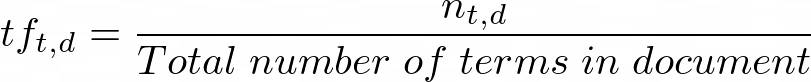

Keterangan:

**tf** = frekuensi kemunculan kata pada sebuah dokumen

Sumber: [Bag of Words vs TF-IDF — Penjelasan dan Perbedaannya](https://medium.com/data-folks-indonesia/bag-of-words-vs-tf-idf-penjelasan-dan-perbedaannya-3739f32cdc72)

In [9]:
# Mendapatkan kata-kata unik sebagai fitur nama atau teks
unique_words = list(set([word for doc in [doc.split() for doc in norm_corpus]
                         for word in doc]))
def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print('Default Feature Dict:', def_feature_dict)

Feature Names: ['berwarna', 'porsinya', 'mengeong', 'merasakan', 'sore', 'kucingku', 'sayuran', 'buahbuahan', 'gulai', 'jatuh', 'tikungan', 'enak', 'cerah', 'sensitif', 'biru', 'langit', 'kucing', 'sarapanku', 'susu', 'anjingku', 'ku', 'bersuara', 'disitulah', 'membuatku', 'indah', 'pagi', 'tibatiba', 'cinta', 'gelisah']
Default Feature Dict: {'berwarna': 0, 'porsinya': 0, 'mengeong': 0, 'merasakan': 0, 'sore': 0, 'kucingku': 0, 'sayuran': 0, 'buahbuahan': 0, 'gulai': 0, 'jatuh': 0, 'tikungan': 0, 'enak': 0, 'cerah': 0, 'sensitif': 0, 'biru': 0, 'langit': 0, 'kucing': 0, 'sarapanku': 0, 'susu': 0, 'anjingku': 0, 'ku': 0, 'bersuara': 0, 'disitulah': 0, 'membuatku': 0, 'indah': 0, 'pagi': 0, 'tibatiba': 0, 'cinta': 0, 'gelisah': 0}


In [10]:
from collections import Counter
# Membangun fitur Bag of Words untuk dokumen teks dalam term frequency (TF)
bow_features = []
for doc in norm_corpus:
  bow_feature_doc = Counter(doc.split())
  all_features = Counter(def_feature_dict)
  bow_feature_doc.update(all_features)
  bow_features.append(bow_feature_doc)
# Mengubah hasil fitur BoW dengan dataframe
bow_features = pd.DataFrame(bow_features)
# Menampilkan fitur TF dan BoW
bow_features

,langit,cerah,indah,berwarna,porsinya,mengeong,merasakan,sore,kucingku,sayuran,...,susu,anjingku,ku,bersuara,disitulah,membuatku,pagi,tibatiba,cinta,gelisah
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
6,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Setelah mengetahui Term Frequency (TF) maka dilanjutkan untuk menghitung frekuensi dokumen teks atau *Document Frequency* (DF) untuk setiap istilah tersebut muncul.

**Apa itu Inverse Document Frequency (IDF)?**

**Inverse Document Frequency (IDF)** merupakan nilai untuk mengukur seberapa penting sebuah kata. IDF akan menilai kata yang sering muncul sebagai kata yang kurang penting berdasarkan kemunculan kata tersebut pada seluruh dokumen. Semakin kecil nilai IDF maka akan dianggap semakin tidak penting kata tersebut, begitu pula sebaliknya. Rumus dari IDF yaitu,

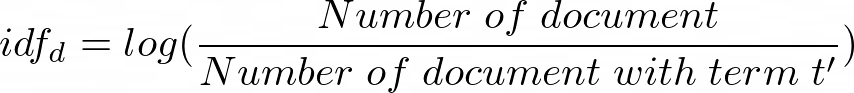


In [11]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)

# Membangun matriks frekuensi dokumen (DF)
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df # Ditambahkan angka 1 untuk memperlancar metode IDF

# Menampilkan frekuensi dokumen yang telah diperhalus
pd.DataFrame([df], columns=feature_names)

,langit,cerah,indah,berwarna,porsinya,mengeong,merasakan,sore,kucingku,sayuran,...,susu,anjingku,ku,bersuara,disitulah,membuatku,pagi,tibatiba,cinta,gelisah
0,4,2,3,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


Hasil diatas menunjukan bahwa frekuensi dokumen pada teks untuk setiap kata atau istilah dapat di verifikasikan dengan data teks korpus sebelumnya. Dalam metode IDF tersebut, ditambahkan 1 disetiap nilai frekuensi dokumen untuk mempermudah metode IDF dan mencegah kesalahan pembagian dengan nol dengan asumsi yang dimiliki dalam dokumen keseluruhan yang memiliki persyaratan sekaligus.

Jadi, jika kalian memeriksa data korpus diatas yang diperoleh yaitu dimana kalian akan melihat bahwa kata "**langit**" yang muncul 3(+1) kali, kemudian kata "**indah**" yang muncul 2(+1) kali dan seterusnya dari kemunculan suatu teks yang ditambahkan nilai 1 untuk IDF.

In [12]:
# compute inverse document frequencies
# Hitung Inverse Document Frequency
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)
# show smoothened idfs
# Menampilkan hasil dari IDF
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,langit,cerah,indah,berwarna,porsinya,mengeong,merasakan,sore,kucingku,sayuran,...,susu,anjingku,ku,bersuara,disitulah,membuatku,pagi,tibatiba,cinta,gelisah
0,1.81,2.5,2.1,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5


Dari hasil diatas menunjukan bahwa setelah menghitung inverse document frequency (IDF) yang ditambahkan dengan nilai 1 ke dalam jumlah total dokumen atau teks korpus untuk menambahkan data teks yang kita asumsikan sebelumnya berisi tentang semua istilah setidaknya satu kali dalam memperlancar hitungan metode IDF.

Setelah mendapatkan hasil dari IDF pada teks korpus maka selanjutnya bisa kita konversikan menjadi operasi matriks untuk mempermudah saat menghitung nilai skor dari TF-IDF pada data teks korpus secara keseluruhan.

In [13]:
# compute idf diagonal matrix
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()

# print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.00,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dapat dilihat hasil diatas menunjukkan matriks dari IDF (*Inverse Document Frequency*) yang dibuat berdasarkan basis persamaan matematika. Dalam code tersebut ditunjukkan untuk mengubahnya menjadi matriks diagonal yang nantinya akan berguna saat ingin menghitung hasil perkalian dengan metode *Term Frequency*.

Setelah mendapatkan hasil dari perhitungan dari TF dan IDF maka kita dapat menghitung nilai matriks fitur TF-IDF menggunakan matriks multiplikasi atau *matrix multiplications* yang akan digambarkan dalam code dibawah ini.

In [14]:
# Komputasi matriks fitur TF-IDF
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
# view raw tfidf feature matrix
# Melihat hasil Raw fitur matriks TF-IDF
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,langit,cerah,indah,berwarna,porsinya,mengeong,merasakan,sore,kucingku,sayuran,...,susu,anjingku,ku,bersuara,disitulah,membuatku,pagi,tibatiba,cinta,gelisah
0,1.81,2.5,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.81,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0
2,0.00,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,...,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,...,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0
4,0.00,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,2.5,2.5,0.0,0.0,0.0,0.0,2.5
6,1.81,0.0,2.1,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
7,0.00,0.0,0.0,0.0,0.0,0.0,2.5,0.0,2.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0


Dari hasil diatas yang kita lihat sekarang adalah menampilkan hasil dari fitur matriks tf-idf dimana perhitungan dari TF dan IDF pada data teks korpus. Namun, jika kalian masih ingat bahwa kita harus membagi hasil tf-idf ini dengan normalisasi L2.

Normalisasi L2 pada metode TF-IDF ini digunakan untuk menghitung setiap dokumen teks korpus dan kemudian membagi bobot dari teks tersebut dengan normalisasi untuk memberikan hasil matriks TF-IDF yang sesuai.

In [15]:
from numpy.linalg import norm
# Normalisasi L2
norms = norm(tfidf, axis=1)
# Menampilkan hasil normalisasi untuk tiap dokumen teks
print (np.round(norms, 3))

[3.736 5.326 4.337 5.599 5.008 5.008 4.497 5.008]


In [16]:
# Menghitung komputasi normalisasi TF-IDF
norm_tfidf = tfidf / norms[:, None]
# Menampilkan hasil akhir matriks fitur TF-IDF
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,langit,cerah,indah,berwarna,porsinya,mengeong,merasakan,sore,kucingku,sayuran,...,susu,anjingku,ku,bersuara,disitulah,membuatku,pagi,tibatiba,cinta,gelisah
0,0.48,0.67,0.56,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0
1,0.34,0.00,0.00,0.47,0.0,0.00,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.47,0.0
2,0.00,0.00,0.00,0.00,0.0,0.58,0.0,0.00,0.0,0.00,...,0.00,0.0,0.58,0.0,0.0,0.00,0.00,0.0,0.00,0.0
3,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.45,...,0.45,0.0,0.00,0.0,0.0,0.00,0.45,0.0,0.00,0.0
4,0.00,0.00,0.00,0.00,0.5,0.00,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0
5,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.00,0.5,0.00,0.5,0.5,0.00,0.00,0.0,0.00,0.5
6,0.40,0.00,0.47,0.00,0.0,0.00,0.0,0.56,0.0,0.00,...,0.00,0.0,0.00,0.0,0.0,0.56,0.00,0.0,0.00,0.0
7,0.00,0.00,0.00,0.00,0.0,0.00,0.5,0.00,0.5,0.00,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.5,0.00,0.0


Bisa kita lihat hasil akhir dari normalisasi L2 dengan TF-IDF yaitu dimana kita bisa mengetahui kata-kata unik atau sering muncul pada dokumen teks. Sebagaimana yang disebutkan pada istilah TF-IDF yaitu digunakan untuk mencari kata atau istilah yang sering muncul atau mengandung unsur kata yang unik.

### **TF-IDF Transformer**

Jika kita sudah mengetahui metode TF-IDF dari awal agar dapat dipahami. Maka, kita bisa gunakan pada library scikit-learn Python agar memudahkan proses mendapatkan fitur pada data teks korpus. Model TF-IDF memiliki 2 pemakaian dalam library Scikit-Learn pada Python yaitu menggunakan `TfidfTransformer` dan `TfidfVectorizer`.

Berikut kode dibawah ini merupakan TF-IDF untuk Transformasi pada data teks korpus.



In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
# TF-IDF Model
tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,anjingku,bersuara,berwarna,biru,buahbuahan,cerah,cinta,disitulah,enak,gelisah,...,merasakan,pagi,porsinya,sarapanku,sayuran,sensitif,sore,susu,tibatiba,tikungan
0,0.0,0.0,0.00,0.00,0.00,0.67,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
1,0.0,0.0,0.47,0.47,0.00,0.00,0.47,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
2,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
3,0.0,0.0,0.00,0.00,0.45,0.00,0.00,0.0,0.0,0.0,...,0.0,0.45,0.0,0.45,0.45,0.0,0.00,0.45,0.0,0.0
4,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.5,0.0,...,0.0,0.00,0.5,0.00,0.00,0.0,0.00,0.00,0.0,0.5
5,0.5,0.5,0.00,0.00,0.00,0.00,0.00,0.5,0.0,0.5,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
6,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.56,0.00,0.0,0.0
7,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.5,0.00,0.0,0.00,0.00,0.5,0.00,0.00,0.5,0.0


Dapat dilihat bahwa dalam pemrosesan tersebut menggunakan opsi normalisasi L2 dari parameter dan memastikan perhitungan IDF untuk memberikan bobot pada tiap dokumen teks korpus yang memungkinkan memiliki nilai nol (0) sehingga pada saat pemrosesan tersebut tidak diabaikan atau dilewati.

### **TF-IDF Vectorizer**

Selain model transformasi pada TF-IDF, bisa juga menggunakan mode *Vectorizer* atau Vektorisasi. **TF-IDF Vectorizer** memungkinkan langsung untuk menghitung vektor TF-IDF dengan mengambil dokumen teks korpus sebagai masukkan data dan kemudian melakukan komputasi mendalam pada Term Frequency dari tiap kata-kata dokumen. Ini sebabnya untuk melakukan pemilahan berdasarkan kebutuhan dalam menggunakan mode `TfidfVectorizer` untuk menghitung frekuensi dokumen teks berdasarkan model Bag Of Words (BoW). Mode **Vectorizer** ini didukung juga untuk menambahkan N-Grams ke dalam vektor fitur.

Berikut kode dibawah ini, TF-IDF mode `TfidfVectorizer` pada data teks korpus.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,anjingku,bersuara,berwarna,biru,buahbuahan,cerah,cinta,disitulah,enak,gelisah,...,merasakan,pagi,porsinya,sarapanku,sayuran,sensitif,sore,susu,tibatiba,tikungan
0,0.0,0.0,0.00,0.00,0.00,0.67,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
1,0.0,0.0,0.47,0.47,0.00,0.00,0.47,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
2,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
3,0.0,0.0,0.00,0.00,0.45,0.00,0.00,0.0,0.0,0.0,...,0.0,0.45,0.0,0.45,0.45,0.0,0.00,0.45,0.0,0.0
4,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.5,0.0,...,0.0,0.00,0.5,0.00,0.00,0.0,0.00,0.00,0.0,0.5
5,0.5,0.5,0.00,0.00,0.00,0.00,0.00,0.5,0.0,0.5,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
6,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.56,0.00,0.0,0.0
7,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.5,0.00,0.0,0.00,0.00,0.5,0.00,0.00,0.5,0.0


Bisa kita lihat bahwa sama seperti sebelumnya di mode Transformer yaitu menggunakan normalisasi L2 dari parameter dan memastikan dalam menghitung IDF dengan baik. Dalam hasil tersebut juga terdapat vektor TF-IDF yang cocok dengan data yang diperoleh sebelumnya.

Jika Anda membandingkan matriks fitur `tfidf` yang diperoleh pada kode diatas untuk dokumen teks korpus dengan matriks fitur yang diperoleh menggunakan `TfidfTransformer` atau `TfidfVectorizer` sebelumnya. Maka kita akan melihat bahwa metode tersebut memiliki kesamaan, sehingga memverifikasi bahwa implementasi matematika menyesuaikan dengan rumus TF-IDF. Faktanya, implementasi yang sama saat ini diadopsi oleh **Scikit-Learn** di belakang layar menggunakan beberapa pengoptimalan saat komputasi.

## **Word Vectorization Using Word2Vec**

Setelah melakukan proses TF-IDF untuk mencari fitur data teks. Maka, tahapan ini merupakan bagian dari Word Embedding yaitu proses dimana representasi vektor dari kata tertentu. Embeddings bisa dihitung dengan banyak cara.


In [19]:

from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_corpus)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_corpus]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

ImportError: cannot import name 'text' from 'keras.preprocessing' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/__init__.py)

In [21]:
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality
window_context = 30   # Context window size
min_word_count = 1   # Minimum word count
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus,
                              window=window_context,
                              vector_size = feature_size,
                              min_count=min_word_count,
                              epochs = 100,
                              sample=sample)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['buahbuahan', 'indah', 'pagi', 'biru', 'susu', 'cinta', 'jatuh','berwarna']}
similar_words

{'buahbuahan': ['kucing', 'sarapanku', 'jatuh', 'enak', 'anjingku'],
 'indah': ['tibatiba', 'disitulah', 'enak', 'sensitif', 'sayuran'],
 'pagi': ['jatuh', 'bersuara', 'mengeong', 'gelisah', 'langit'],
 'biru': ['porsinya', 'gulai', 'tikungan', 'sarapanku', 'mengeong'],
 'susu': ['berwarna', 'langit', 'porsinya', 'kucingku', 'gulai'],
 'cinta': ['sarapanku', 'jatuh', 'cerah', 'anjingku', 'tibatiba'],
 'jatuh': ['sayuran', 'kucingku', 'buahbuahan', 'pagi', 'cinta'],
 'berwarna': ['susu', 'kucingku', 'gulai', 'membuatku', 'buahbuahan']}

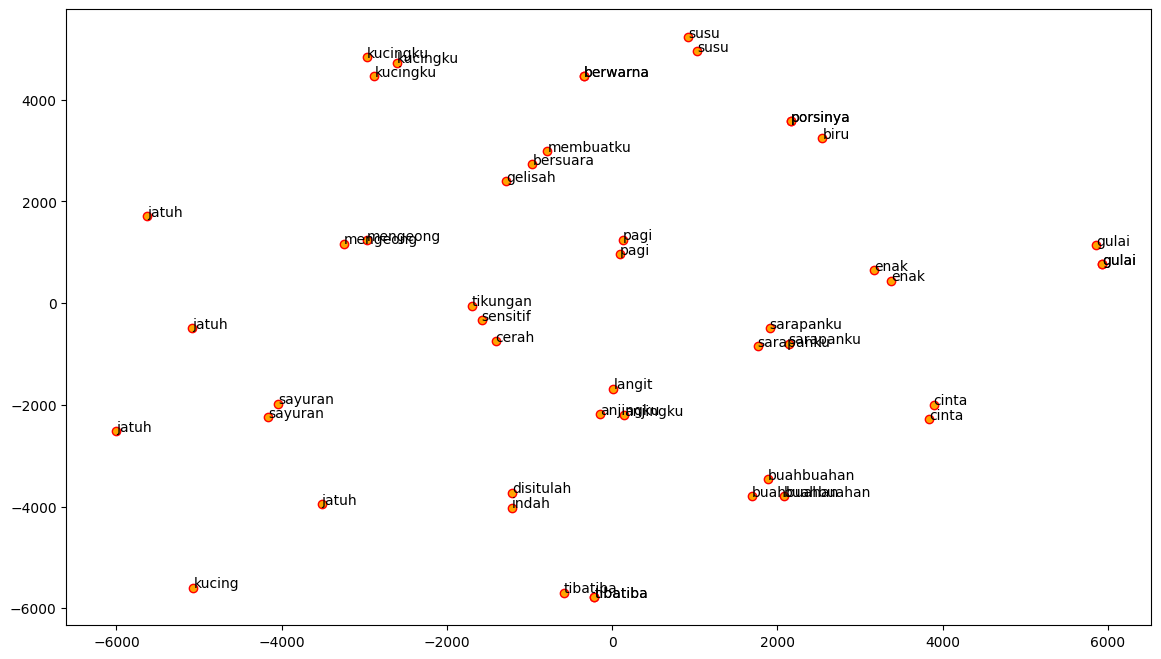

In [ ]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [22]:
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Set values for various parameters
feature_size = 10    # Word vector dimensionality
window_context = 10  # Context window size
min_word_count = 1   # Minimum word count
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus,
                              vector_size = feature_size,
                              window=window_context,
                              min_count = min_word_count,
                              epochs = 100,
                              sample = sample)

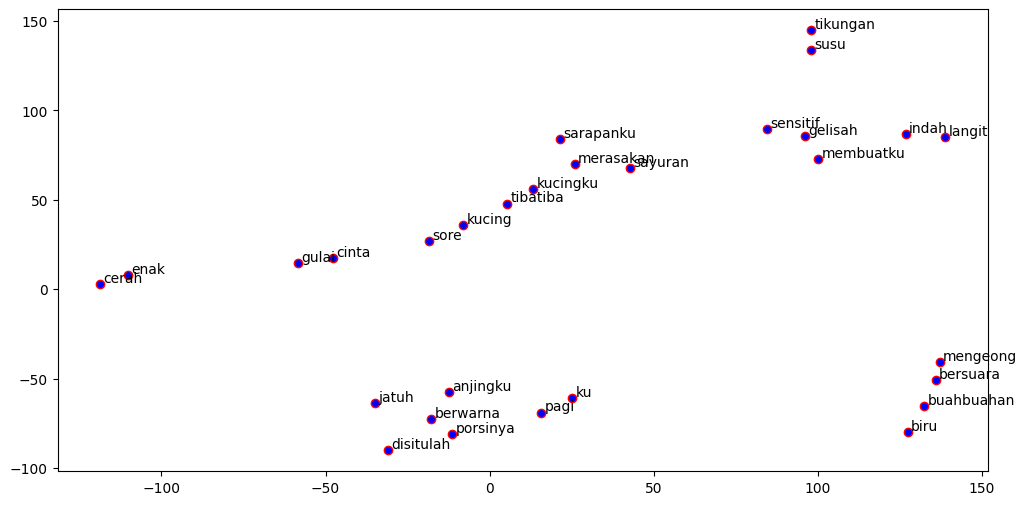

In [23]:
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='blue', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [24]:
w2v_model.wv['langit']

array([-0.00539945,  0.00225409,  0.0507936 ,  0.08949544, -0.09249945,
       -0.07086455,  0.06534178,  0.09029816, -0.05092154, -0.03653426],
      dtype=float32)

In [25]:
w2v_model.wv['cerah']

array([-0.07520402, -0.00945431,  0.09541215, -0.0732547 , -0.02327649,
       -0.01948275,  0.08082237, -0.05929366,  0.00037374, -0.0476448 ],
      dtype=float32)

## **Document Similarity**

Setelah kita mengetahui Word Vectorization Menggunakan Word2Vec. Ada tahapan feature engineering yang dipelajari bagian akhir yaitu cara mencari kesamaan dalam suatu dokumen teks dengan menggunakan metode Cosine Similarity.







### **Cosine Similarity**

**Cosine Similarity** adalah metode machine learning yang digunakan untuk mencari kesamaan dalam suatu teks atau dokumen. Metode ini merupakan model aljabar untuk representasi dokumen teks seperti pada *term index* yang digunakan pada *ranked retrieval*, termasuk *document clustering* dan *text classification*.

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.164851,0.0,0.0,0.0,0.0,0.457382,0.0
1,0.164851,1.000000,0.0,0.0,0.0,0.0,0.136932,0.0
2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0
5,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0
6,0.457382,0.136932,0.0,0.0,0.0,0.0,1.000000,0.0
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0


## **Summary**

Berdasarkan Hands-on code yang telah dijabarkan bahwa kita telah mengetahui bagaimana cara mengolah data teks yang harus dilakukan dalam eksplorasi data teks. Tahapan-tahapan ini dikenal dengan nama **Feature Engineering**.